In [1]:
import numpy as np
import math
import sys
import matplotlib.pyplot as plt
from scipy.linalg import inv,pinvh,eig,eigh
from scipy.stats import linregress
%matplotlib inline

In [23]:
def Slope(a=1,p=1,nx=1000,npt=15):
    # power subdunction
    def power(M,r) :
        D,P = eigh(M)
        D   = np.diag(D**r)
        return P.dot(D).dot(np.transpose(P))
    # initialisation
    dx   = 1/nx
    # Matrice opérateur
    T   = dx*np.tri(nx)
    tTT = np.transpose(T).dot(T)
    # Matrice regularisation
    B   = 2*nx**2*np.diag(np.ones(nx)) \
          - nx**2*np.diag(np.ones(nx-1),1)\
          - nx**2*np.diag(np.ones(nx-1),-1)
    B[0,0]= nx**2
    D   = power(B,p/2)
    tDD = np.transpose(D).dot(D)
    q   = 2*(p+a)
    R   = power(B,q/2)
    print("commute coeff : ",np.linalg.norm(tTT.dot(tDD)-tDD.dot(tTT)))
    # Synthetic Data
    t  = np.linspace(0,1,nx)
    b  = 0.1
    d  = 0.9 
    x  = np.zeros(nx)
    for i,ti in enumerate(t): 
        if ti <b:
            pass
        elif ti>d:
            pass
        else:
            try:
                f  = 1/ti+1/(1-ti)
            except OverflowError:
                f  = float('inf')
            x[i] = math.exp(-f)
    #
    x  = x/np.linalg.norm(x)
    rho= np.linalg.norm(R.dot(x))
    #
    y  = T.dot(x)
    # eps
    eps   = np.logspace(-3,-1,npt)
    delta = np.zeros(npt)
    err   = np.zeros(npt)
    #
    no = np.random.randn(nx)
    no = no*np.linalg.norm(y)/np.linalg.norm(no)
    for i,l in enumerate(eps):
        # step0 : initialisation
        error_compare = 1000
        # step1 : noisy data
        yd = y + l*no
        delta[i] = np.linalg.norm(yd-y)
        # step 2 : optimal alpha
        alpha_op = (delta[i]/rho)**(2*(a+p)/(3*a+2*p))
        for alpha in np.linspace(alpha_op/10,alpha_op*10,100*npt):
            # step 3 : inversion
            xd    = np.linalg.inv(tTT + alpha*tDD).dot(np.transpose(T).dot(yd))
            # step 4 : error
            error = np.linalg.norm(xd-x)
            if error < error_compare:
                error_compare = error
                err[i]        = error
                reg           = alpha
        if i%5==0:
            plt.figure(figsize=(7, 4))
            plt.subplot(121)
            plt.plot(t,y)
            plt.plot(t,yd)
            plt.subplot(122)
            plt.plot(t,x)
            plt.plot(t,xd)
            plt.show()
        print("delta = ",delta[i],\
              ", err = ", err[i],\
              ", alpha = ",reg,\
             ", alpha_op = ",alpha_op)
    # plot
    s,r,_,_,_ = linregress(np.log(delta), np.log(err))
    plt.loglog(delta,err,'r+',label='error')
    plt.loglog(delta,np.exp(r)*delta**s,label="%.3f"%s)
    plt.legend()
    # stat
    q = 2*p+a
    print("th. smax =", q/(a+q),", s = %.2f"%(s), ", R = %.5f"%(R))
    print("th. qmax = ",q ,", q = %.2f"%(s*a/(1-s)))

# a=1

commute coeff :  3.4374790465483764e-09


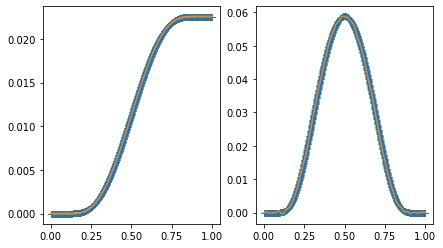

delta =  0.00046321683134976026 , err =  0.006876756739236455 , alpha =  3.6383113205178247e-09 , alpha_op =  3.6383113205178247e-10
delta =  0.0006436377000782928 , err =  0.008659771165288365 , alpha =  4.733534774965833e-09 , alpha_op =  4.733534774965833e-10
delta =  0.0008943316842674756 , err =  0.010919422428874708 , alpha =  6.15844810735488e-09 , alpha_op =  6.15844810735488e-10
delta =  0.001242669845764797 , err =  0.013793301934870082 , alpha =  8.012296284705483e-09 , alpha_op =  8.012296284705483e-10
delta =  0.0017266841516835488 , err =  0.017458998490478356 , alpha =  1.0424199511762806e-08 , alpha_op =  1.0424199511762806e-09


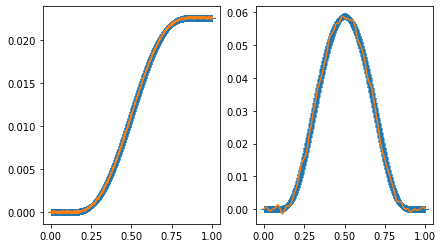

delta =  0.002399219848969796 , err =  0.022143524034683976 , alpha =  1.3562146430912995e-08 , alpha_op =  1.3562146430912995e-09
delta =  0.003333705170154131 , err =  0.02813430872253326 , alpha =  1.7644694502055038e-08 , alpha_op =  1.7644694502055038e-09
delta =  0.004632168313497599 , err =  0.0357920349607716 , alpha =  2.295619249186151e-08 , alpha_op =  2.295619249186151e-09
delta =  0.006436377000782928 , err =  0.04556555769495512 , alpha =  2.986658531617091e-08 , alpha_op =  2.9866585316170913e-09
delta =  0.008943316842674765 , err =  0.05800937696123194 , alpha =  3.8857180639357104e-08 , alpha_op =  3.885718063935711e-09


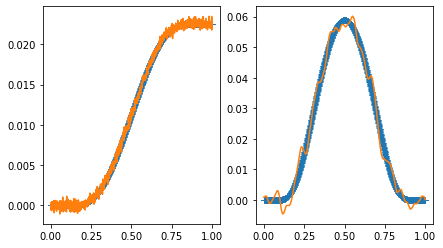

delta =  0.012426698457647982 , err =  0.07380500078779384 , alpha =  5.055417186986294e-08 , alpha_op =  5.055417186986294e-09
delta =  0.017266841516835493 , err =  0.0937892336538702 , alpha =  6.57722524227359e-08 , alpha_op =  6.577225242273589e-09
delta =  0.02399219848969795 , err =  0.11899450926394306 , alpha =  8.557135897500392e-08 , alpha_op =  8.557135897500393e-09
delta =  0.03333705170154129 , err =  0.1507078933975081 , alpha =  1.1133049587180909e-07 , alpha_op =  1.1133049587180908e-08
delta =  0.04632168313497598 , err =  0.19055540903799958 , alpha =  1.4484378254041086e-07 , alpha_op =  1.4484378254041085e-08
th. s = 0.75
th. qmax =  3 , q = 2.63


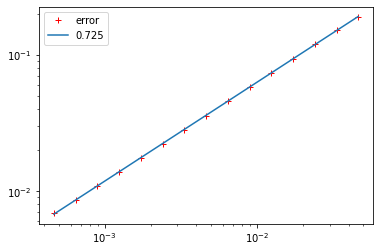

In [24]:
a = 1
p = 1
Slope(a,p)

commute coeff :  0.006234968207151054


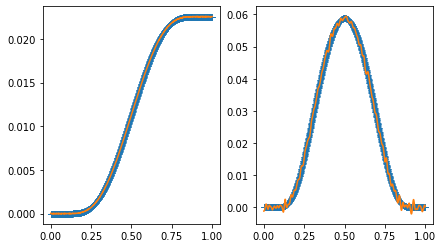

delta =  0.00046321683134975956 , err =  0.022781223282241997 , alpha =  1.8715850616836826e-15 , alpha_op =  1.8715850616836827e-16
delta =  0.0006436377000782919 , err =  0.029203471677258497 , alpha =  2.4811815879427217e-15 , alpha_op =  2.4811815879427217e-16
delta =  0.0008943316842674757 , err =  0.03748540360884202 , alpha =  3.2893306312285815e-15 , alpha_op =  3.2893306312285814e-16
delta =  0.0012426698457647977 , err =  0.04819781620937543 , alpha =  4.36070300300342e-15 , alpha_op =  4.3607030030034203e-16
delta =  0.0017266841516835494 , err =  0.062068918193840424 , alpha =  5.781033533044557e-15 , alpha_op =  5.781033533044557e-16


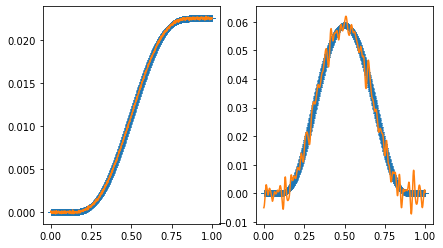

delta =  0.0023992198489697966 , err =  0.0800211309274023 , alpha =  7.663981859614717e-15 , alpha_op =  7.663981859614717e-16
delta =  0.0033337051701541292 , err =  0.10322618459994325 , alpha =  1.0160227856967642e-14 , alpha_op =  1.0160227856967641e-15
delta =  0.004632168313497596 , err =  0.13318595581145243 , alpha =  1.3469529546967236e-14 , alpha_op =  1.3469529546967236e-15
delta =  0.006436377000782926 , err =  0.171843505093541 , alpha =  1.7856708409566262e-14 , alpha_op =  1.7856708409566263e-15
delta =  0.008943316842674765 , err =  0.22172690504528797 , alpha =  2.3672841290590478e-14 , alpha_op =  2.3672841290590476e-15


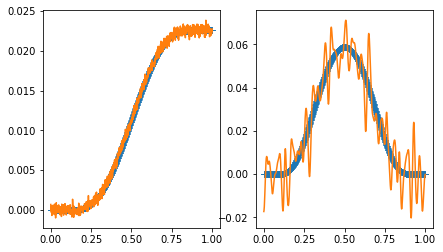

delta =  0.012426698457647978 , err =  0.28613275753145007 , alpha =  3.138335475474661e-14 , alpha_op =  3.1383354754746612e-15
delta =  0.01726684151683549 , err =  0.3693689426683671 , alpha =  4.1605270088713983e-14 , alpha_op =  4.160527008871398e-15
delta =  0.02399219848969794 , err =  0.477090565889484 , alpha =  5.515657942505432e-14 , alpha_op =  5.515657942505432e-15
delta =  0.03333705170154128 , err =  0.6167653039714964 , alpha =  7.312170423086807e-14 , alpha_op =  7.312170423086808e-15
delta =  0.04632168313497597 , err =  0.7982861039963689 , alpha =  9.693827437018018e-14 , alpha_op =  9.693827437018019e-15
th. s = 0.8333333333333334
th. qmax =  5 , q = 3.40


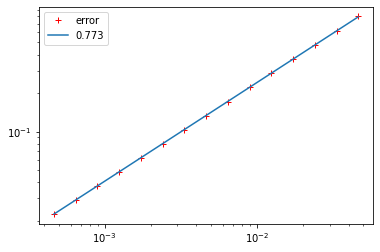

In [25]:
a = 1
p = 2
Slope(a,p)